<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/homework0/endtoend_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
#Getting the data
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://github.com/Ranjani94/Deep_Learning/blob/master/"
HOUSING_PATH = os.path.join("datasets", "data")
HOUSING_URL = DOWNLOAD_ROOT + "Datasets"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()

In [0]:
from google.colab import files
from io import BytesIO
upload = files.upload()

Saving data.csv to data (1).csv


In [0]:
data = pd.read_csv("data.csv", header=0)
data.head()


,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1,3,1,1,benign
1,2,1002945,5,4,4,5,7,10,3,2,1,benign
2,3,1015425,3,1,1,1,2,2,3,1,1,benign
3,4,1016277,6,8,8,1,3,4,3,7,1,benign
4,5,1017023,4,1,1,3,2,1,3,1,1,benign


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
Unnamed: 0         683 non-null int64
Id                 683 non-null int64
Cl.thickness       683 non-null int64
Cell.size          683 non-null int64
Cell.shape         683 non-null int64
Marg.adhesion      683 non-null int64
Epith.c.size       683 non-null int64
Bare.nuclei        683 non-null int64
Bl.cromatin        683 non-null int64
Normal.nucleoli    683 non-null int64
Mitoses            683 non-null int64
Class              683 non-null object
dtypes: int64(11), object(1)
memory usage: 64.2+ KB


In [0]:
data.isnull()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
678,False,False,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
data["Class"].value_counts()

benign       444
malignant    239
Name: Class, dtype: int64

In [0]:
data.describe()


,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
count,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,352.355783,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,202.563927,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,177.500000,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,356.000000,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,527.500000,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,699.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Saving figure attribute_histogram_plots


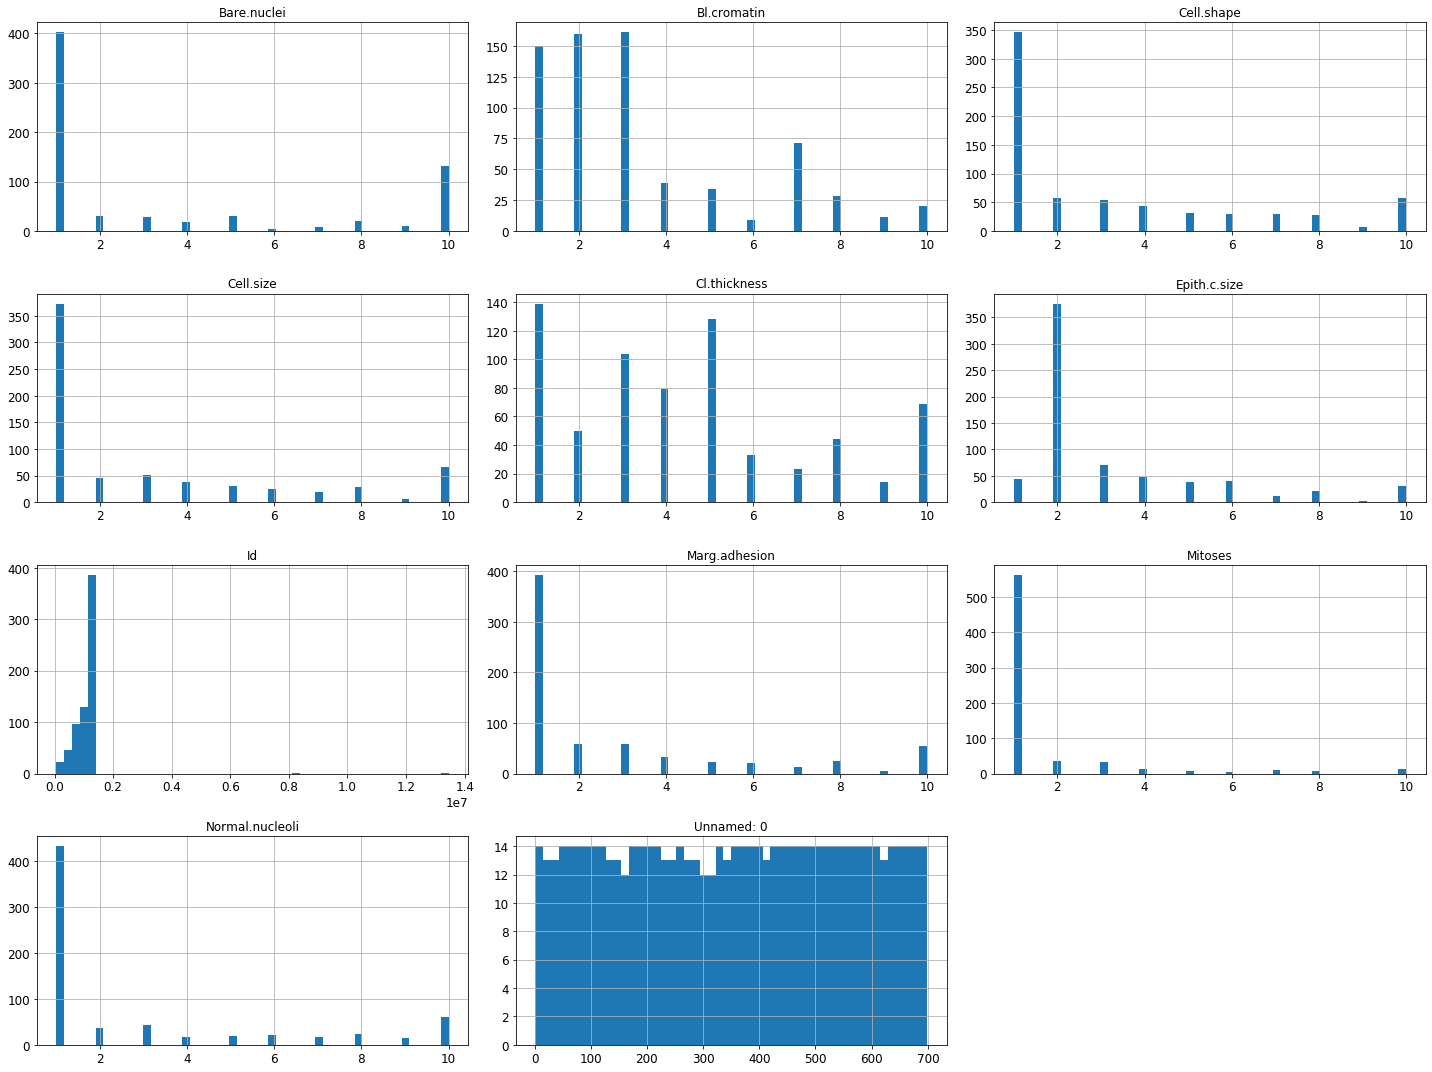

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:

# to make this notebook's output identical at every run
np.random.seed(42)

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
train_set, test_set = split_train_test(data, 0.2)
len(train_set)


547

In [0]:
len(test_set)

136

In [0]:

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [0]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [0]:
data_with_id = data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [0]:
test_set.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
292,305,653777,8,3,4,9,3,10,3,3,1,malignant
145,150,1187805,8,8,7,4,10,10,7,8,7,malignant
211,218,1223426,1,1,1,1,2,1,3,1,1,benign
118,121,1174057,1,1,2,2,2,1,3,1,1,benign
302,315,704097,1,1,1,1,1,1,2,1,1,benign


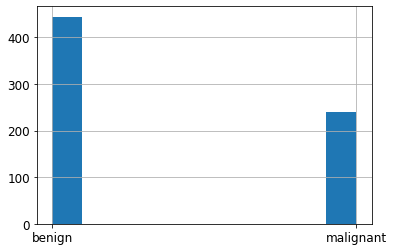

In [0]:
data["Class"].hist()

In [0]:
data["Class"].value_counts()

benign       444
malignant    239
Name: Class, dtype: int64

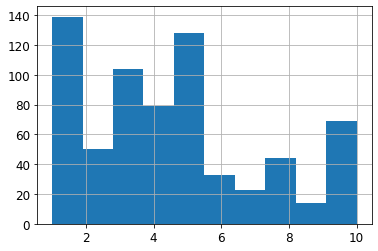

In [0]:
data["Cl.thickness"].hist()

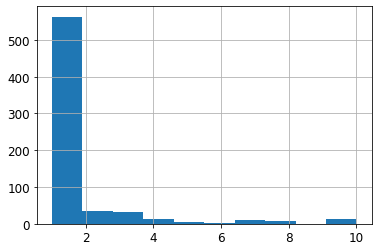

In [0]:
data["Mitoses"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Class"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [0]:
strat_test_set["Class"].value_counts() / len(strat_test_set)

benign       0.649635
malignant    0.350365
Name: Class, dtype: float64

In [0]:
data["Class"].value_counts() / len(data)

benign       0.650073
malignant    0.349927
Name: Class, dtype: float64

In [0]:
def income_cat_proportions(data):
    return data["Class"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [0]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
benign,0.650073,0.649635,0.576642,-11.295785,-0.067403
malignant,0.349927,0.350365,0.423358,20.984638,0.125218


In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Class", axis=1, inplace=True)

In [0]:
data = strat_train_set.copy()

Saving figure bad_visualization_plot


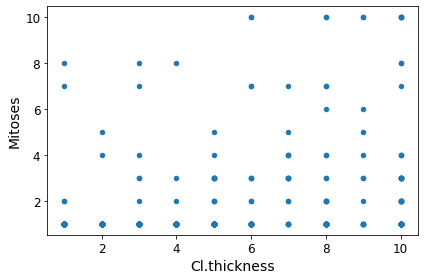

In [0]:
data.plot(kind="scatter", x="Cl.thickness", y="Mitoses")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


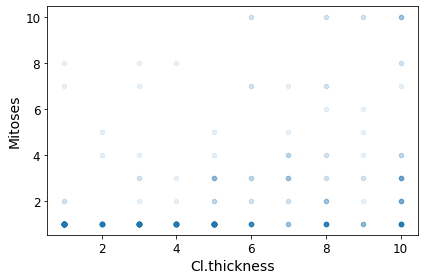

In [0]:

data.plot(kind="scatter", x="Cl.thickness", y="Mitoses", alpha=0.1)
save_fig("better_visualization_plot")


In [0]:
corr_matrix = data.corr()

In [0]:
corr_matrix["Cl.thickness"].sort_values(ascending=False)

Cl.thickness       1.000000
Cell.shape         0.649109
Cell.size          0.631022
Bare.nuclei        0.576951
Normal.nucleoli    0.520533
Bl.cromatin        0.506422
Epith.c.size       0.495184
Marg.adhesion      0.466546
Mitoses            0.363623
Id                -0.082321
Unnamed: 0        -0.117362
Name: Cl.thickness, dtype: float64

Saving figure scatter_matrix_plot


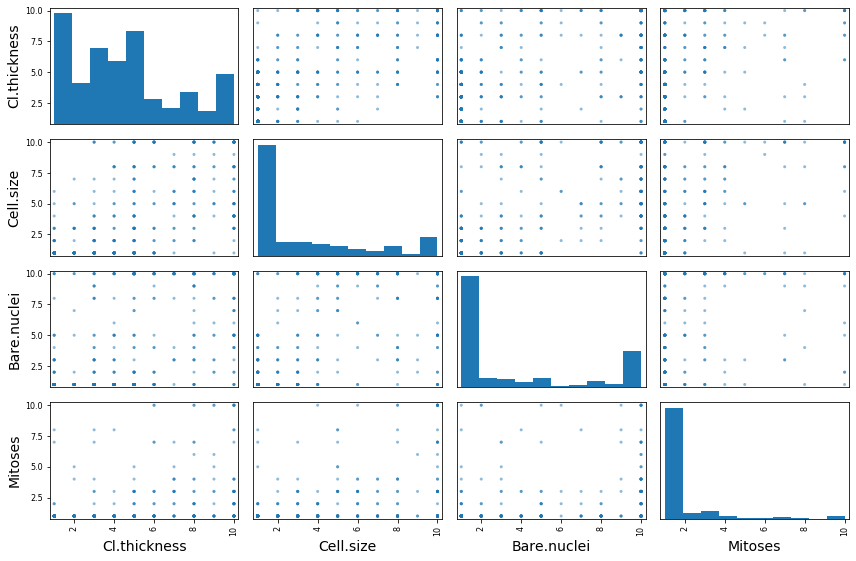

In [0]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Cl.thickness", "Cell.size", "Bare.nuclei",
              "Mitoses"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure scatterplot


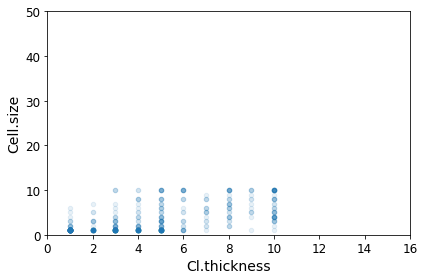

In [0]:

data.plot(kind="scatter", x="Cl.thickness", y="Cell.size",
             alpha=0.1)
plt.axis([0, 16, 0, 50])
save_fig("scatterplot")

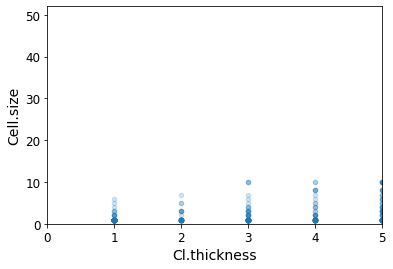

In [0]:
data.plot(kind="scatter", x="Cl.thickness", y="Cell.size",
             alpha=0.2)
plt.axis([0, 5, 0, 52])
plt.show()

In [0]:
data = strat_train_set.drop("Cl.thickness", axis=1) # drop labels for training set
data_labels = strat_train_set["Cl.thickness"].copy()

In [0]:

sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,Unnamed: 0,Id,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses


In [0]:
sample_incomplete_rows.dropna(subset=["Cell.size"])

,Unnamed: 0,Id,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses


In [0]:
median = data["Cell.size"].median()
sample_incomplete_rows["Cell.size"].fillna(median, inplace=True)

Series([], Name: Cell.size, dtype: int64)

In [0]:
sample_incomplete_rows

,Unnamed: 0,Id,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [0]:
imputer.fit(data)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
imputer.statistics_

array([3.475000e+02, 1.172684e+06, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 2.000000e+00, 1.000000e+00, 3.000000e+00,
       1.000000e+00, 1.000000e+00])

In [0]:
data.median().values

array([3.475000e+02, 1.172684e+06, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 2.000000e+00, 1.000000e+00, 3.000000e+00,
       1.000000e+00, 1.000000e+00])

In [0]:

X = imputer.transform(data)

In [0]:

data_tr = pd.DataFrame(X, columns=data.columns,
                          index=data.index)

In [0]:
data_tr.loc[sample_incomplete_rows.index.values]

,Unnamed: 0,Id,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses


In [0]:
imputer.strategy

'median'

In [0]:
data_tr.head()

,Unnamed: 0,Id,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
198,205.0,1217264.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
359,374.0,521441.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
481,497.0,1181567.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
125,128.0,1177027.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
598,614.0,1016634.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0


In [0]:

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data)
data_encoded[:10]

array([[159., 346.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.],
       [293.,  40.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.],
       [387., 279.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 99., 271.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.],
       [476., 140.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   0.],
       [ 43., 197.,   1.,   3.,   0.,   4.,   0.,   4.,   3.,   3.],
       [238.,  58.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.],
       [297.,  63.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.],
       [362., 415.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.],
       [435., 473.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.]])

In [0]:
ordinal_encoder.categories_

[array([  1,   3,   4,   5,   7,   8,   9,  10,  11,  12,  14,  15,  17,
         19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  32,  33,  34,
         35,  36,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,  50,
         51,  52,  53,  57,  58,  59,  60,  62,  63,  64,  65,  66,  67,
         70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  84,
         85,  87,  88,  89,  90,  91,  95,  99, 100, 101, 102, 103, 104,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 147, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 164, 166, 167,
        168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183,
        184, 185, 186, 187, 189, 191, 192, 193, 194, 197, 198, 199, 200,
        201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217, 218, 220, 223, 225, 226, 227, 228

In [0]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(data)
housing_cat_1hot

<546x1137 sparse matrix of type '<class 'numpy.float64'>'
	with 5460 stored elements in Compressed Sparse Row format>

In [0]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(data)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cat_encoder.categories_

[array([  1,   3,   4,   5,   7,   8,   9,  10,  11,  12,  14,  15,  17,
         19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  32,  33,  34,
         35,  36,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,  50,
         51,  52,  53,  57,  58,  59,  60,  62,  63,  64,  65,  66,  67,
         70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  84,
         85,  87,  88,  89,  90,  91,  95,  99, 100, 101, 102, 103, 104,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 147, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 164, 166, 167,
        168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183,
        184, 185, 186, 187, 189, 191, 192, 193, 194, 197, 198, 199, 200,
        201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217, 218, 220, 223, 225, 226, 227, 228